In [1]:
# Projeto da disciplina IF816 2020.3 -  
# O objetivo é prever a progressão da epidemia da doença coronavírus (Covid-19) no estado de Pernambuco.

## <center>Introdução</center>

Este projeto tem como objetivo mostrar como está a pandemia COVID-19 em Pernambuco e apresentar previsões de qual será a situação da pandemia no estado nas próximas semanas. No momento dia este projeto foi feito, o estado de Pernambuco, com uma população estimada de 9.616.621 pessoas, notificou 27235 casos confirmados de pessoas infectadas, 133.512 pessoas recuperadas e 8.438 mortos. O modelo matemático utilizado para as previsões utilizado é o SEIRD, S indicando o número de pessoas suscetíveis, I o número de pessoas infectadas, R o de recuperados, e D o número de mortes. Nas equações diferenciais utilizadas nas previsões, algumas constantes foram utilizadas, sendo elas β (taxa de infecção ), γ (probabilidade de recuperação), μ (taxa de letalidade), σ (taxa de indivíduos expostos). Vale lembrar que a pandemia COVID-19 é uma pandemia dinâmica, logo esses valores podem mudar drasticamente na medida que o tempo passa. Com todos os gráficos apresentados, que foram construídos a partir das simulações, e com as comparações que foram feitas das diferentes medidas possíveis que podem ser adotadas para o enfrentamento da pandemia, esse projeto levanta a discussão e aponta quantas vidas poderiam ter sido salvas se uma postura diferente tivesse sido adotada no enfrentamento a COVID-19..


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
#Inicialização das variáveis
N = 9616621            #Número de cidadãos pernambucanos
R0 = 1247              #Número de pessoas recuperadas
D0 = 749               #Número de óbitos 
I0 = 27235             #Número de pessoas infectadas
E0 = 12256             #Número de pessoas expostas ao vírus
S0 = N - I0 - R0 - D0  #Número de pessoas suscetíveis
gamma = 1./10.         #Probabilidade de recuperação
beta = 0.3             #Taxa de infecção
sigma = 0.5    
mu = 0.03              #Taxa de letalidade
t = np.linspace(0, 160, 160)

In [4]:
#Implementação das equações diferenciais
def deriv(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R, M = y
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

In [5]:
y0 = S0, E0, I0, R0, D0
ret = odeint(deriv, y0, t, args = (N, beta, sigma, gamma, mu))
S, E, I, R, M = ret.T


## Gráfico do número de sucetíveis e o de expostos!

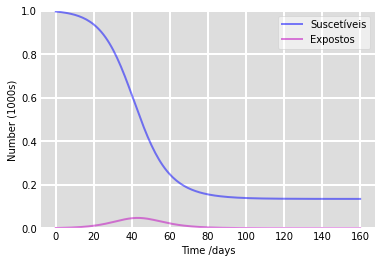

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, E/N, 'm', alpha=0.5, lw=2, label='Expostos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir1.png')
plt.show()

## Gráfico do número de Infectados, Recuperados, e o de Mortos!

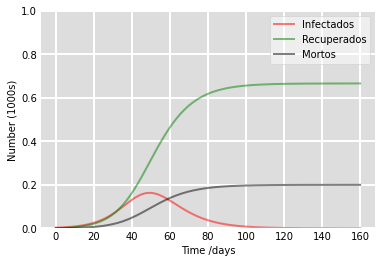

In [7]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(t, M/N, 'k', alpha=0.5, lw=2, label='Mortos')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir2.png')
plt.show()